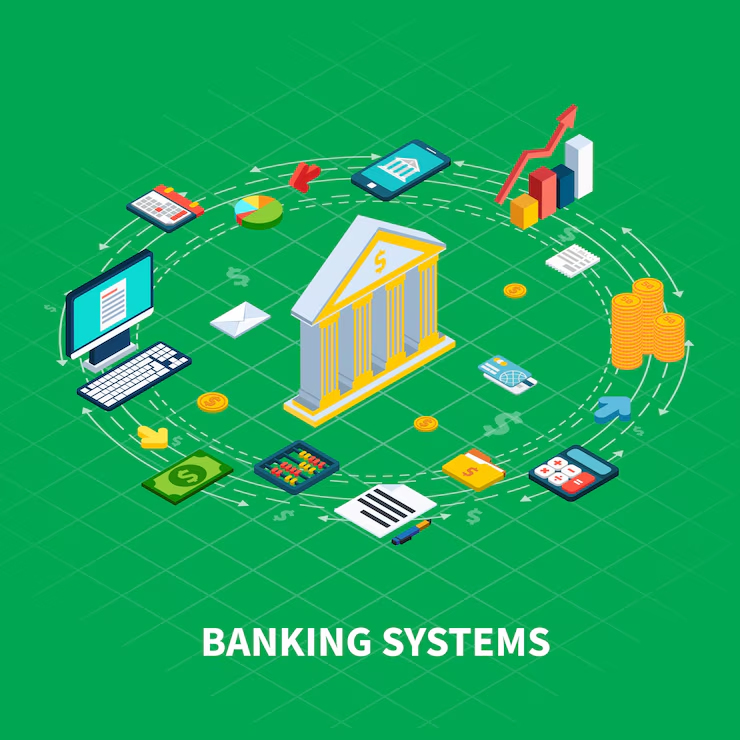!

# BANKING DATASET:

### INTRODUCTION

* This project focuses on analyzing a bank marketing dataset obtained from Kaggle, which includes data collected from a Portuguese banking institution’s direct marketing campaigns. These campaigns were conducted over phone calls to promote term deposit subscriptions. The dataset consists of various customer attributes such as age, job, marital status, education, account balance, and details of the marketing campaign (e.g., duration, previous contacts, campaign outcomes).

* The main objective of the project is to gain meaningful insights into customer behavior and build a predictive model that can accurately forecast whether a customer will subscribe to a term deposit. Through this project, we apply key data science techniques including data cleaning, exploratory data analysis (EDA), feature engineering, and machine learning to support data-driven decision-making in banking marketing strategies.

### ABOUT AS

* In this project, we explored and analyzed the Bank Marketing Dataset from Kaggle, which includes over 45,000 customer records. After cleaning and preprocessing the data—handling missing values, encoding categorical variables, and scaling numeric features—we performed exploratory data analysis to identify patterns and correlations.

* We found that features such as duration of last contact, previous campaign outcome, and number of contacts were strongly correlated with the likelihood of a customer subscribing to a term deposit. Using models such as Logistic Regression, Decision Tree, Random Forest, and XGBoost, we trained and tested predictive classifiers.

* Among these, Random Forest and XGBoost delivered the highest accuracy and better generalization. The models were evaluated using precision, recall, F1-score, and ROC-AUC score to ensure robustness.

* The insights derived can help banks better target potential customers, reduce campaign costs, and increase subscription rates. This project demonstrates how machine learning and data analysis can significantly improve marketing effectiveness in the banking industry.



# IMPORT LIBARIES:

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# DATA LOADING:

In [10]:
df=pd.read_csv(r"C:\Users\GCE PMNA\Downloads\Bank Marketing Dataset.csv")

In [11]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# DATA CLEANING PROCESS:

In [13]:
df.shape

(11162, 17)

In [14]:
df.size

189754

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [16]:
df.info

<bound method DataFrame.info of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campa

In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [18]:
df.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [19]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("-"*50)
    print("\n")

age
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
--------------------------------------------------


job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
--------------------------------------------------


marital
['married' 'single' 'divorced']
--------------------------------------------------


education
['secondary' 'tertiary' 'primary' 'unknown']
--------------------------------------------------


default
['no' 'yes']
--------------------------------------------------


balance
[2343   45 1270 ... 1594 2593 -134]
--------------------------------------------------


housing
['yes' 'no']
--------------------------------------------------


loan
['no' 'yes']
---------------------------------------

In [20]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [23]:
int=df.select_dtypes(include='int')

In [24]:
int

,age,balance,day,duration,campaign,pdays,previous
0,59,2343,5,1042,1,-1,0
1,56,45,5,1467,1,-1,0
2,41,1270,5,1389,1,-1,0
3,55,2476,5,579,1,-1,0
4,54,184,5,673,2,-1,0
...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0
11158,39,733,16,83,4,-1,0
11159,32,29,19,156,2,-1,0
11160,43,0,8,9,2,172,5


# OUTLIER DETECTION:

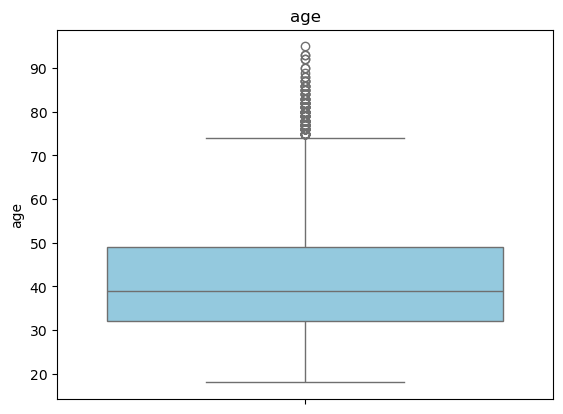

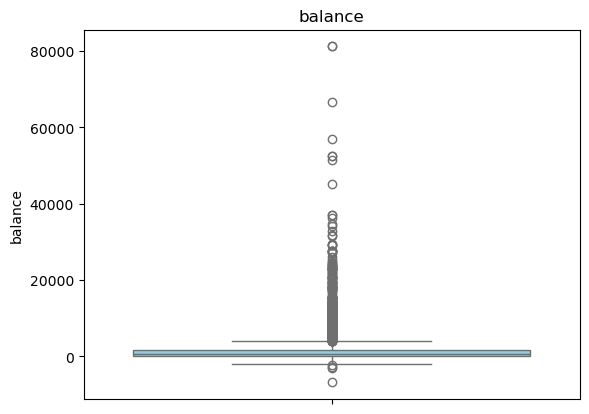

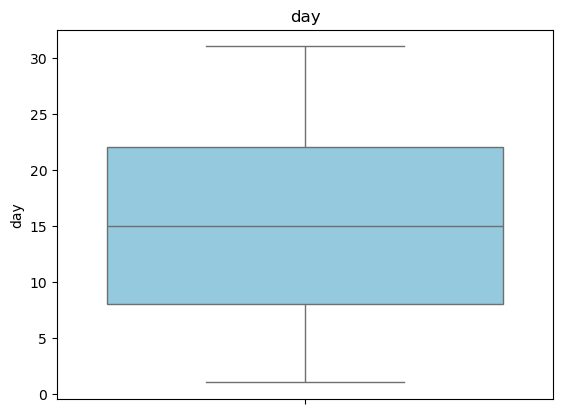

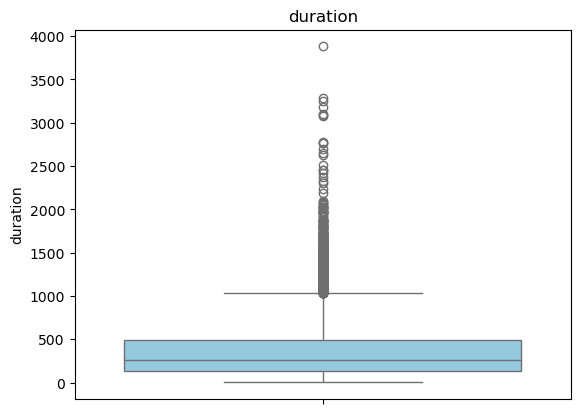

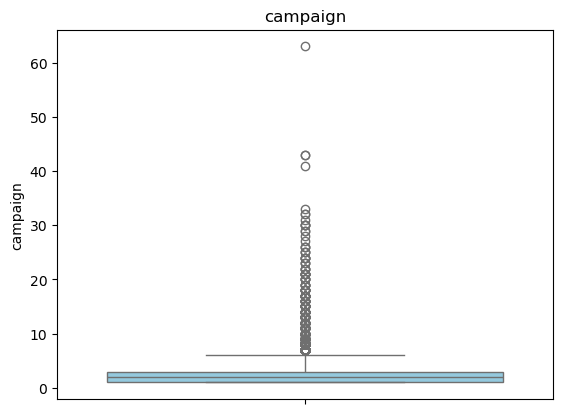

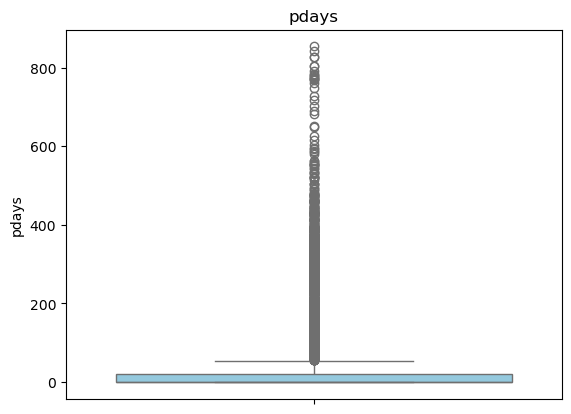

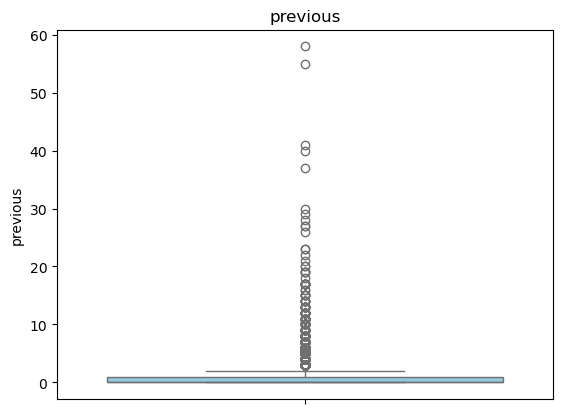

In [26]:
for i in int:
    plt.title(i)  
    sns.boxplot(df[i],color='skyblue')
    plt.show()

# OUTLIER HANDLING:

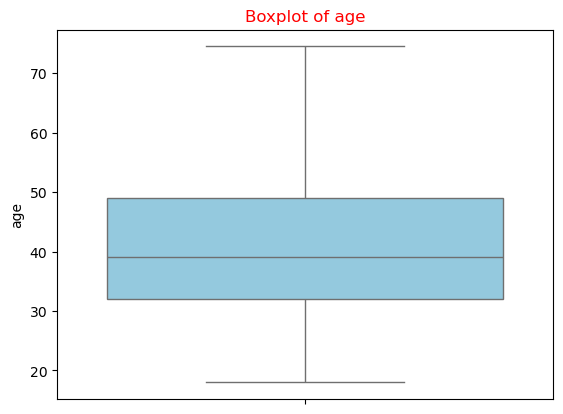

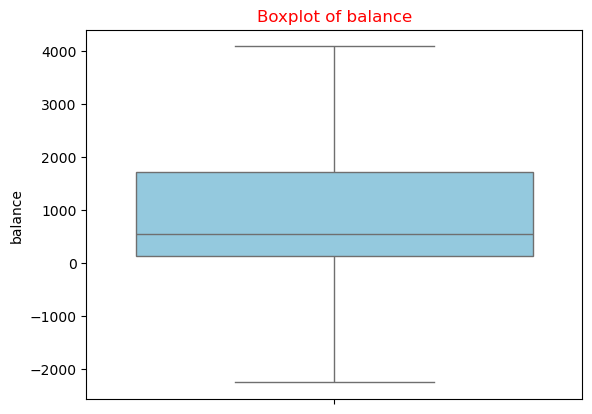

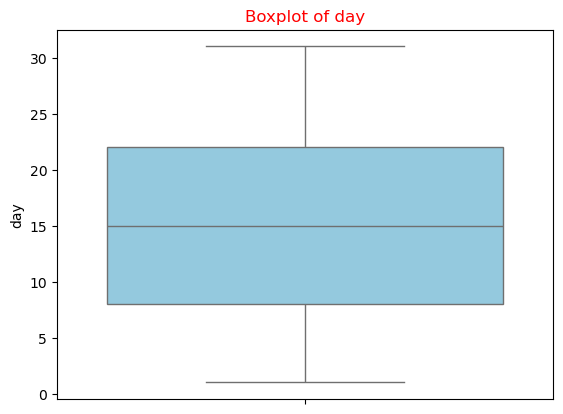

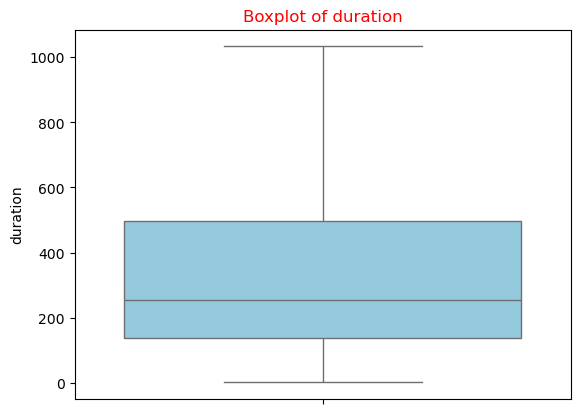

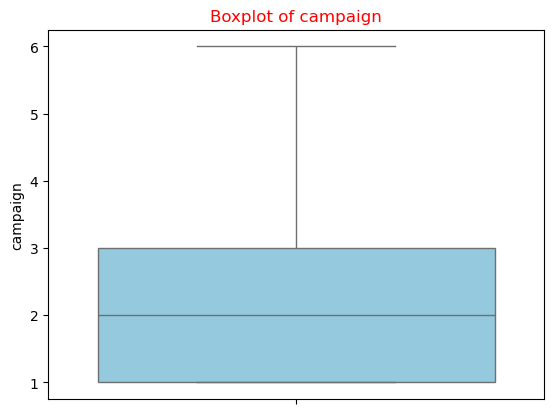

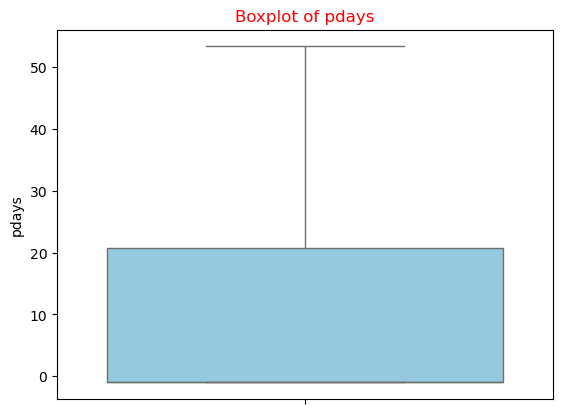

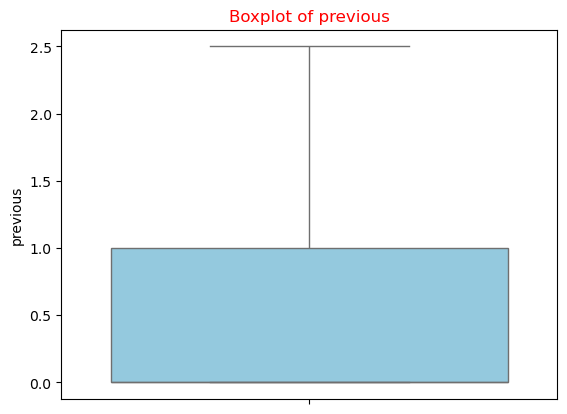

In [28]:
for col in int:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)  
    sns.boxplot(y=df[col],color='skyblue')
    plt.title(f'Boxplot of {col}',color='Red')
    plt.show() 

# EXPLORATORY DATA ANALYSIS (EDA):

## UNIVARIATE:

#### COUNTPLOT:

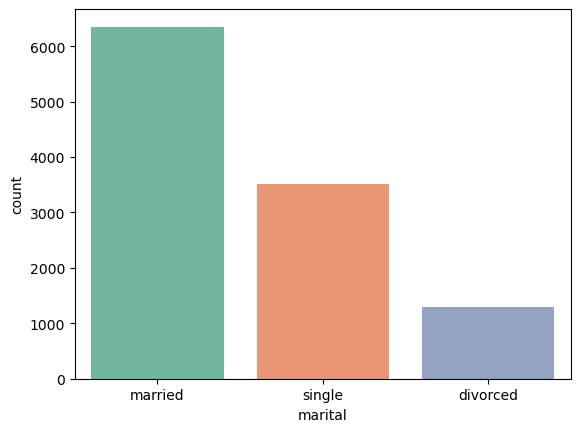

In [32]:
sns.countplot(x="marital",data=df,palette='Set2');

* The bar chart showing the count of customers in each marital status category.
* Each bar's height represents how many entries (rows) fall into that category (e.g., how many married, single, or divorced customers there are).



#### HISTOGRAM:

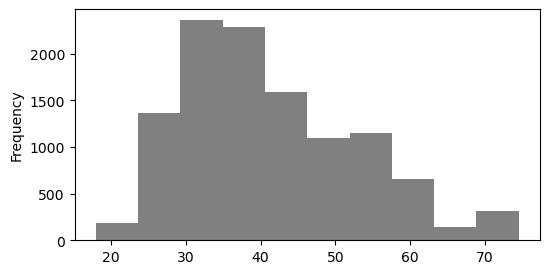

In [35]:
df.age.plot.hist(figsize=(6,3),color="grey");

* A peak around 30–40 years may indicate most customers are in that age group.

* A long tail on the right could show that older customers are fewer but still present.

* Gaps or drops may indicate missing or rare age values.



#### DISTPLOT:

<Axes: xlabel='balance', ylabel='Density'>

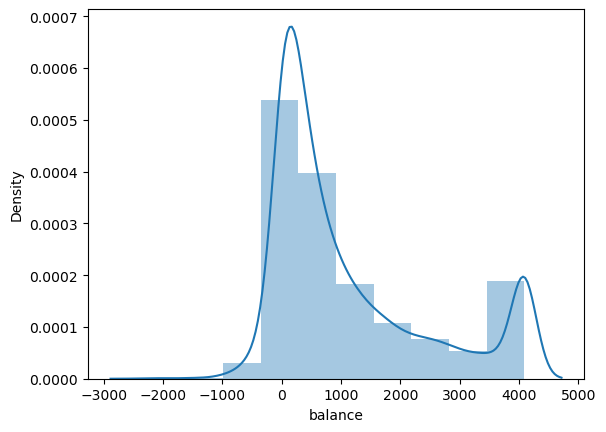

In [38]:
sns.distplot(df['balance'],kde=True,bins=10)

* The most poeples account balance is zero

#### Kde Plot:

<Axes: xlabel='balance', ylabel='Density'>

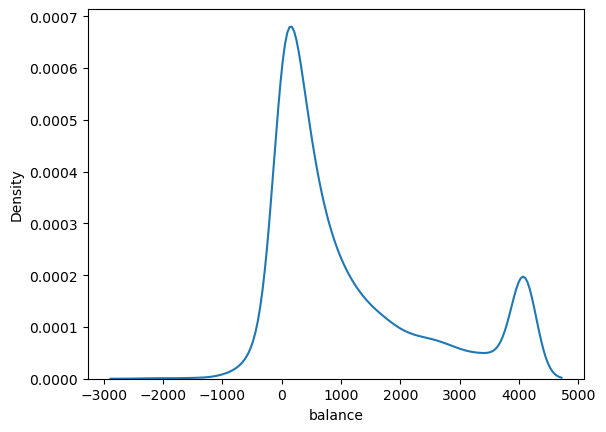

In [41]:
sns.kdeplot(df['balance'])

* The most poeples account balance is zero

## BIVARIATE:

#### BARPLOT:

In [45]:
def bar_education_balance(a,b):
    sns.set(style="ticks")
    ax=sns.barplot(x=df[a],y=df[b],color='green')
    plt.grid(color='green',linewidth=0.3)
    plt.tight_layout()
    plt.show()
    return

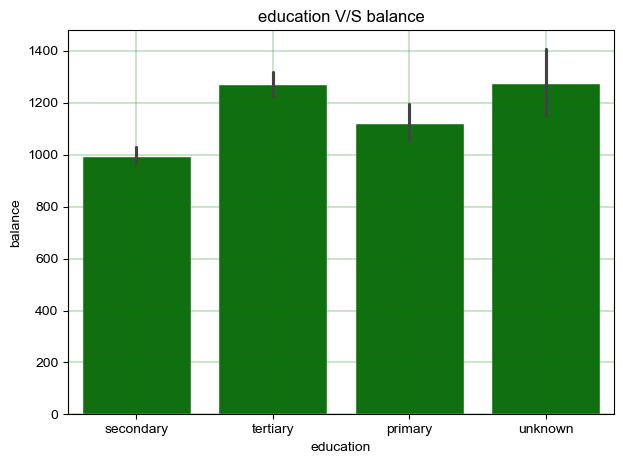

In [46]:
plt.title("education V/S balance")
bar_education_balance('education','balance')

* Customers with tertiary (college/university) education may have higher average balances than those with only primary education.

* A large number of customers may fall into the "unknown" category, which may require separate handling or interpretation.


#### BARPLOT:

In [49]:
def bar_marital_balance(a,b):
    sns.set(style="ticks")
    ax=sns.barplot(x=df[a],y=df[b],color='violet')
    plt.grid(color='violet',linewidth=0.3)
    plt.tight_layout()
    plt.show()
    return

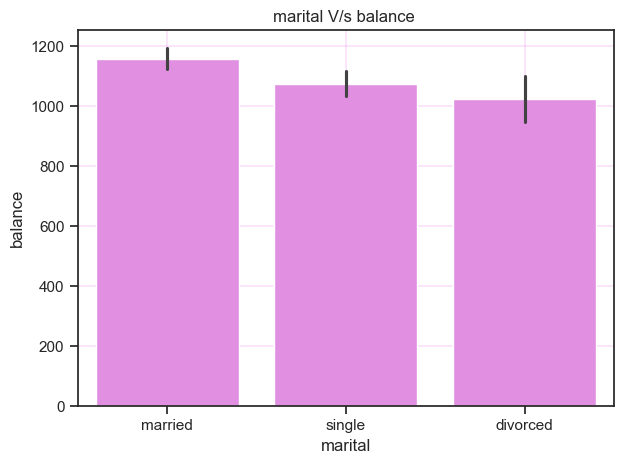

In [50]:
plt.title("marital V/s balance ")
bar_marital_balance('marital','balance')

* You might find that married customers have higher average balances compared to single or divorced customers.

* Single customers may have lower balances, possibly indicating younger age or lower income.

* Divorced customers might show greater variability in balances.

* If there’s an “unknown” or “other” category, it might need special attention or cleaning.

#### COUNTPLOT:

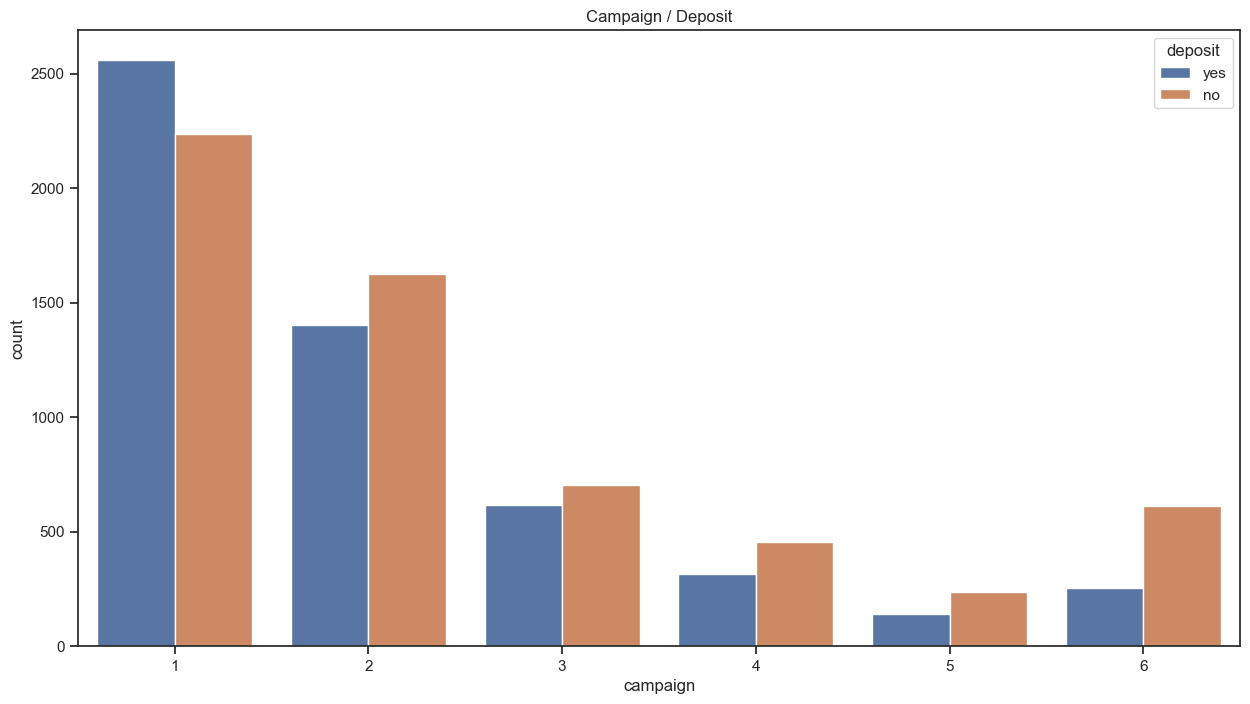

In [53]:
plt.figure(figsize=(15,8))
plt.title('Campaign / Deposit')
sns.countplot(x="campaign", hue="deposit", data=df)
plt.show()

* The majority of successful subscriptions occurred when customers were contacted between 1–2 times. Contacting them more than 5 times led to very few additional conversions, suggesting that fewer, well-timed calls may be more effective.

#### JOINTPLOT:

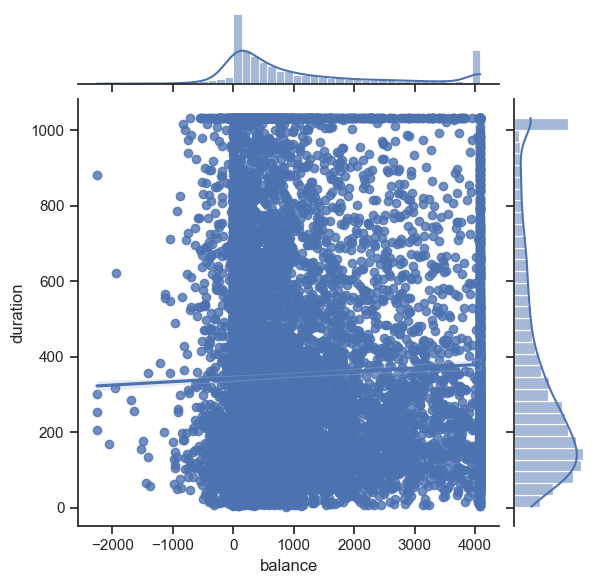

In [56]:
sns.jointplot(x='balance',y='duration',data=df,kind='reg')

* The plot shows a weak positive correlation between call duration and balance — suggesting that customers with longer call durations might have slightly higher account balances, though the relationship is not strong. Most customers fall under a 0–500 balance and 0–300 seconds duration.

## MULTIVARIATE:

#### BARPLOT:

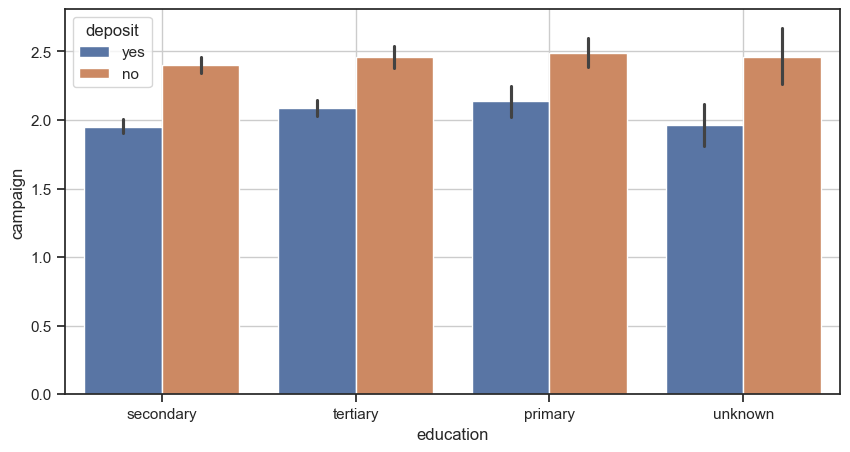

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['education'],y=df['campaign'],hue=df['deposit'])
plt.grid()
plt.show()

* Customers with tertiary education who subscribed to a deposit needed fewer campaign calls on average than those who didn’t. Meanwhile, customers with primary education required more follow-up calls and still had lower conversion rates — suggesting education level may affect responsiveness to marketing.

#### HEAT MAP:

<Axes: >

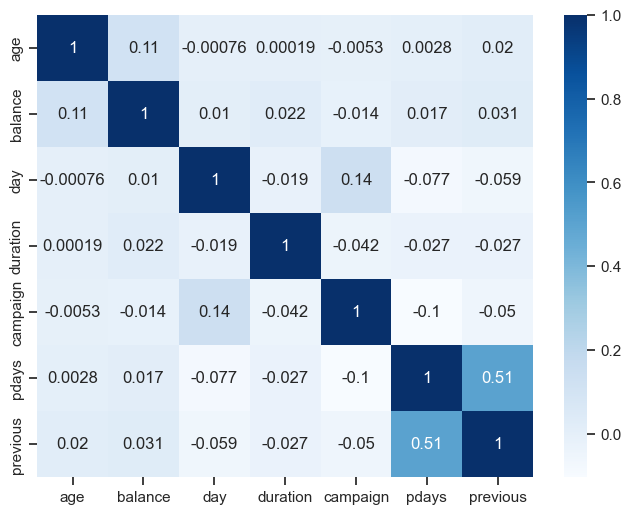

In [63]:
plt.figure(figsize=(8,6))
y=int.corr()
sns.heatmap(y,annot=True,cmap='Blues')

* The heatmap shows that duration has a strong positive correlation with deposit, suggesting that longer calls are more likely to lead to subscriptions. However, campaign has a weak or slightly negative correlation with deposit, indicating more calls don’t necessarily lead to better outcomes.

#### PAIRGRID:

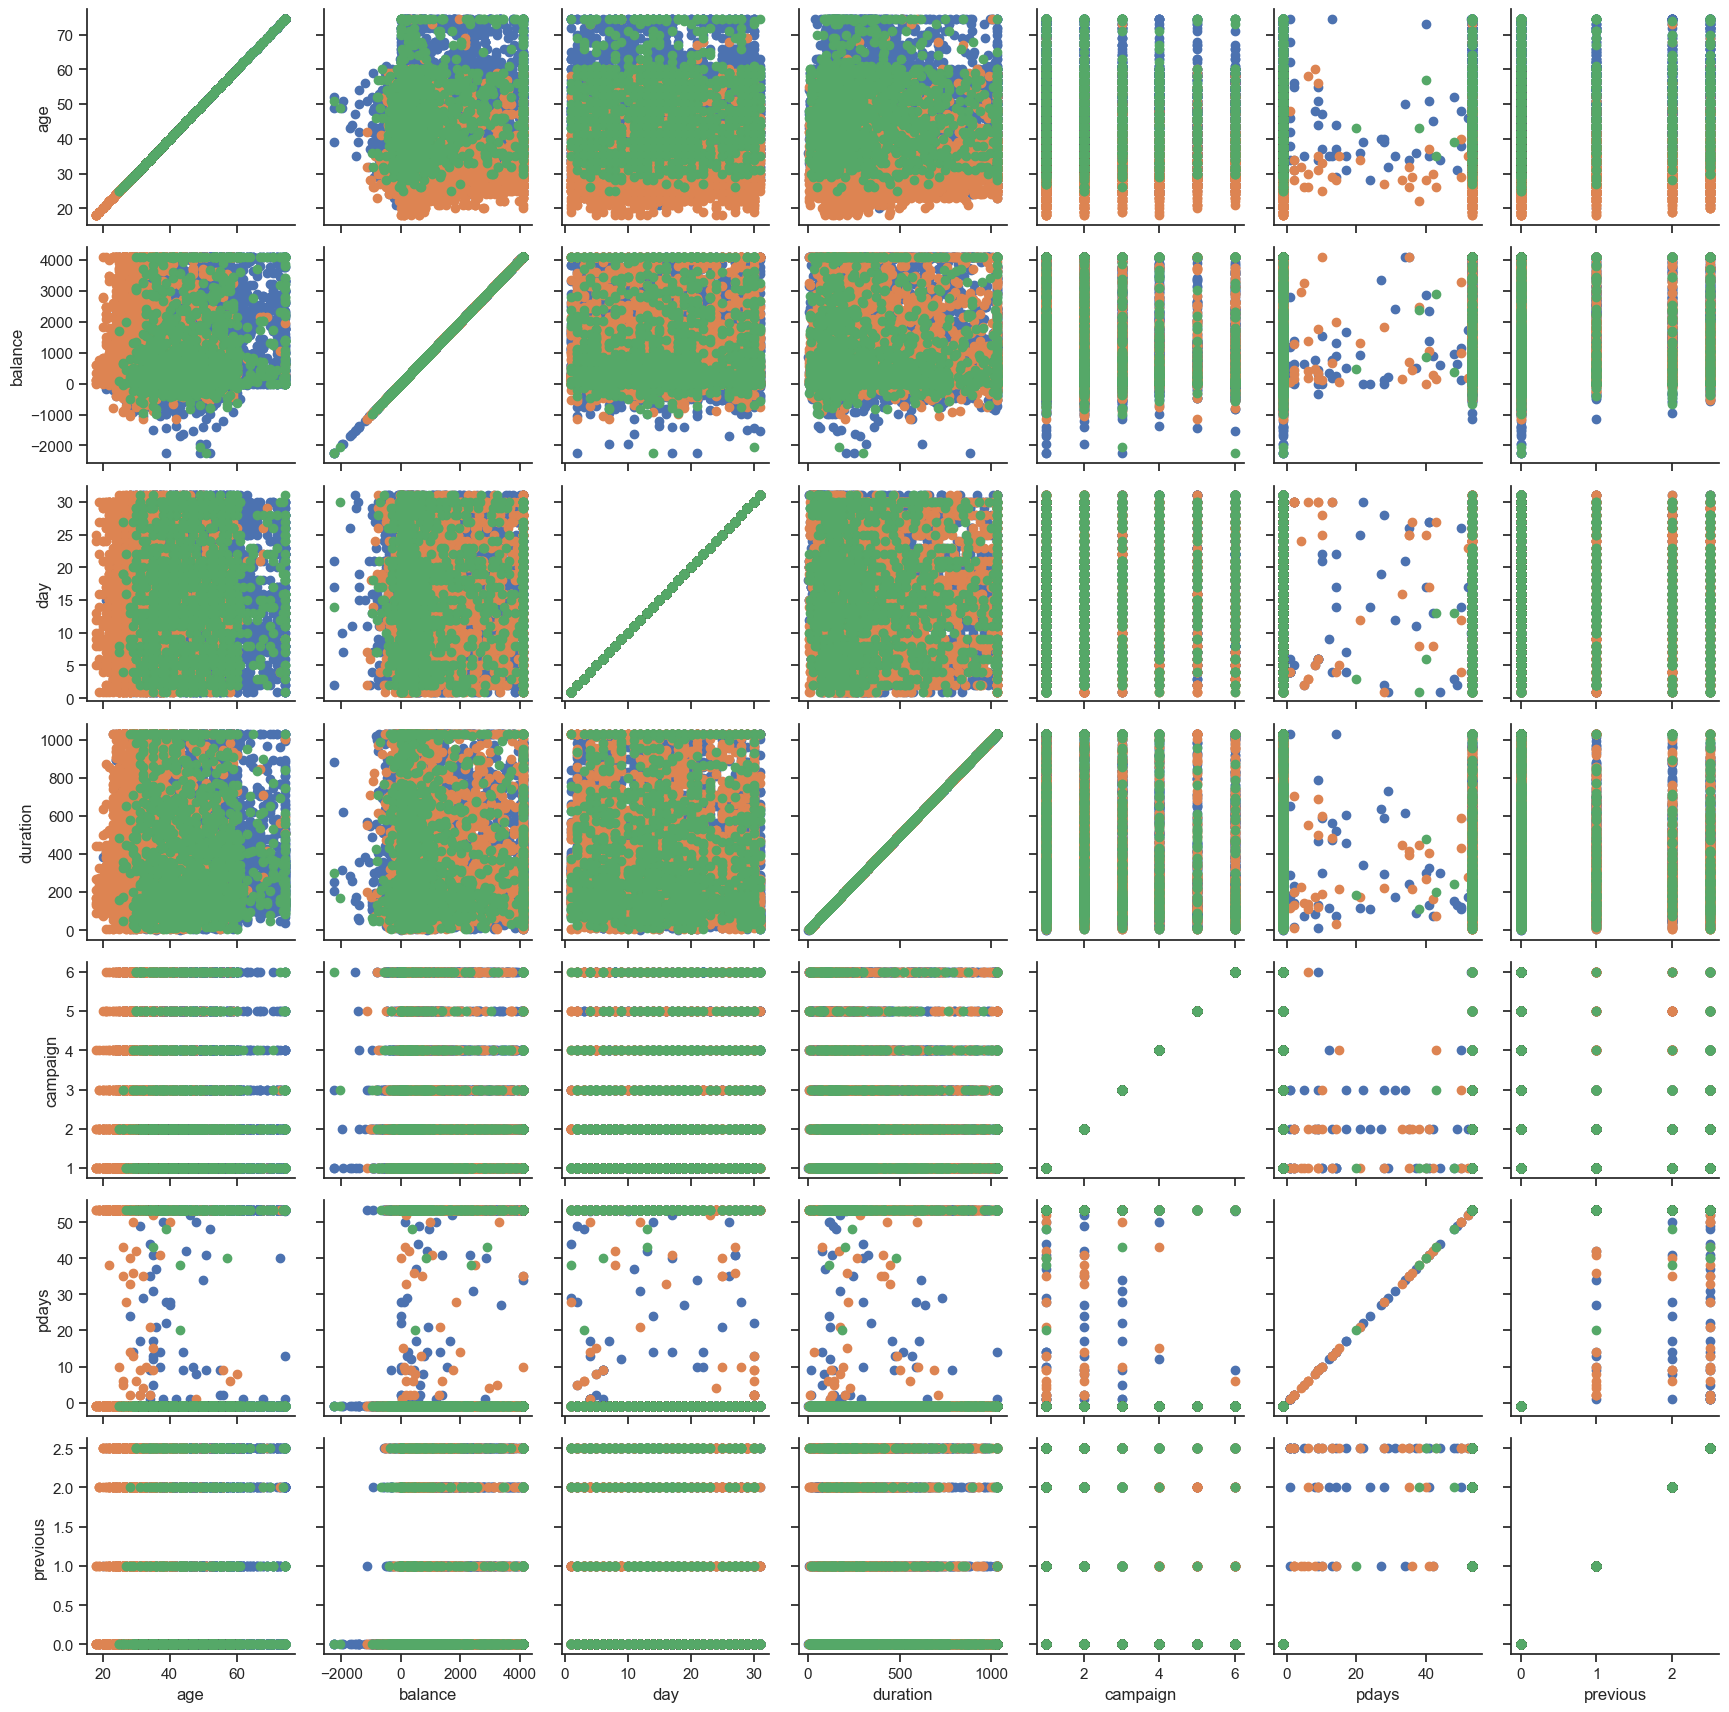

In [66]:
x=sns.PairGrid(df,hue='marital')
x.map(plt.scatter)

* In the PairGrid, married and single customers show different patterns in balance and campaign calls. Married customers tend to have slightly higher balances with fewer calls, while single customers are more dispersed, suggesting marital status may be useful in modeling customer behavior.

#### PIE CHART:

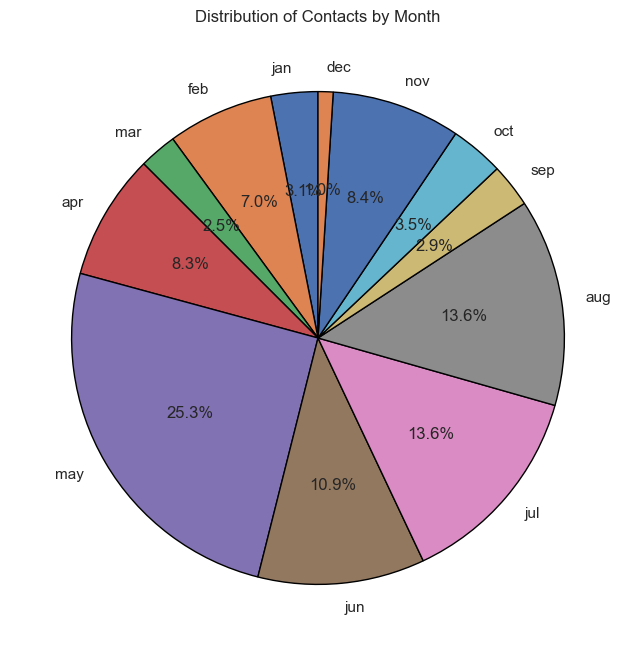

In [69]:
month_counts = df['month'].value_counts()

calendar_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                  'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_counts = month_counts.reindex(calendar_order)

plt.figure(figsize=(8, 8))
month_counts.plot.pie(autopct='%1.1f%%', startangle=90, 
                      wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of Contacts by Month')
plt.ylabel('')  
plt.show()

* The pie chart shows that nearly 25.3% of all marketing contacts were made in May, indicating that the campaign was most active during this month. Very few contacts occurred in mar and December, likely due to holidays or planning periods.

## ENCODING:

## Label Encoding:

In [74]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,0,1,1,0,2343,1,0,2,5,8,1033,1,-1.000,0.0,3,1
1,56.0,0,1,1,0,45,0,0,2,5,8,1033,1,-1.000,0.0,3,1
2,41.0,9,1,1,0,1270,1,0,2,5,8,1033,1,-1.000,0.0,3,1
3,55.0,7,1,1,0,2476,1,0,2,5,8,579,1,-1.000,0.0,3,1
4,54.0,0,1,2,0,184,0,0,2,5,8,673,2,-1.000,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1,2,0,0,1,1,0,0,20,0,257,1,-1.000,0.0,3,0
11158,39.0,7,1,1,0,733,0,0,2,16,6,83,4,-1.000,0.0,3,0
11159,32.0,9,2,1,0,29,0,0,0,19,1,156,2,-1.000,0.0,3,0
11160,43.0,9,1,1,0,0,0,1,0,8,8,9,2,53.375,2.5,0,0


In [75]:
data=df.copy()

# SCALING:

In [77]:
columns=df.columns

In [78]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_array = scaler.fit_transform(df)
# Convert back to DataFrame
df=pd.DataFrame(scaled_array,columns=columns)
scaled_array

array([[ 1.17647059, -0.66666667,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        , -0.66666667,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.11764706,  0.83333333,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.41176471,  0.83333333,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.23529412,  0.83333333,  0.        , ...,  2.5       ,
        -3.        ,  0.        ],
       [-0.29411765,  0.83333333,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

# Test & Train:

In [80]:
x=df.drop(['deposit'], axis=1)
y=df['deposit']

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

### LOGISTIC REGRESSION

In [84]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train, y_train) # scaled one
log_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test, log_pred)
print("Accuracy :",accuracy*100)

Accuracy : 80.25078369905955


#### KNN REGRESSION

In [86]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
knn_pred=kn.predict(x_test)
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy :",accuracy*100)

  File "C:\Users\GCE PMNA\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Accuracy : 79.62382445141067


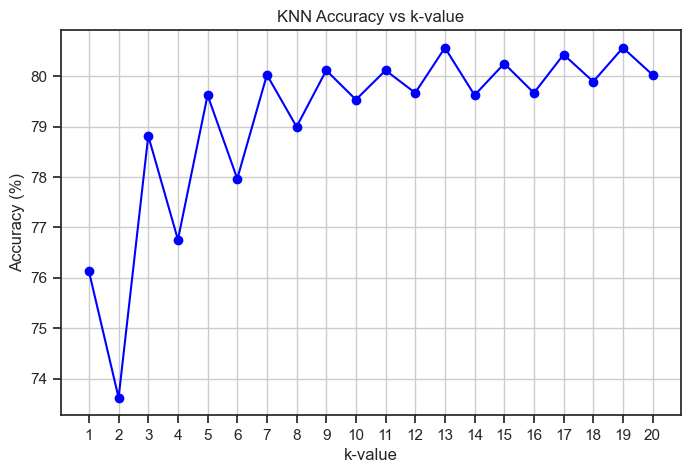

In [87]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try different k values
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc * 100)  # Convert to percentage

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title("KNN Accuracy vs k-value")
plt.xlabel("k-value")
plt.ylabel("Accuracy (%)")
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### DECISION TREE REGRESSION

In [89]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier() 
dtc.fit(x_train, y_train) 
dtc_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, dtc_pred)
print("Accuracy :",accuracy*100)


Accuracy : 77.65338110165696


#### RANDOM FOREST REGRESSION

In [91]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()
ran.fit(x_train,y_train)
rf_pred=ran.predict(x_test)
accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy :",accuracy*100)

Accuracy : 85.08732646663681


#### NAIVE BAYERS REGRESSION

In [93]:
from sklearn.naive_bayes import GaussianNB 
nb = GaussianNB() 
nb.fit(x_train, y_train) 
nb_pred = nb.predict(x_test)
accuracy = accuracy_score(y_test, nb_pred)
print("Accuracy :",accuracy*100)

Accuracy : 75.86206896551724


#### GRADIANT BOOSTING REGRESSION

In [95]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier() 
gbc.fit(x_train, y_train) 
gbc_pred = gbc.predict(x_test)
accuracy = accuracy_score(y_test, gbc_pred)
print("Accuracy :",accuracy*100)

Accuracy : 84.5499328257949


#### XG BOOST REGRESSION

In [97]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(x_train,y_train)
xgb_pred=xg.predict(x_test)
accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy :",accuracy*100)

Accuracy : 85.53515450067174


#### LIGHTGBM REGRESSION

In [99]:
from lightgbm import LGBMClassifier 
lgbm=LGBMClassifier(verbose=-1)
lgbm.fit(x_train,y_train)
lgbm_pred=lgbm.predict(x_test)
accuracy = accuracy_score(y_test, lgbm_pred)
print("Accuracy :",accuracy*100)

Accuracy : 86.20689655172413


# Catboost Model :

In [101]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(
    verbose=0,
    random_seed=42,
    eval_metric='Accuracy',
    early_stopping_rounds=50
)
cat.fit(x_train,y_train)
cat_pred=cat.predict(x_test)
accuracy = accuracy_score(y_test, cat_pred)
print("Accuracy :",accuracy*100)

Accuracy : 86.4308105687416


In [102]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score

table = [
    ['Model', 'Accuracy'],
    ['Logistic Regression', f"{accuracy_score(y_test, log_pred)*100:.2f}%"],
    ['XGB Classifier', f"{accuracy_score(y_test, xgb_pred)*100:.2f}%"],
    ['Gradient Boosting',f"{accuracy_score(y_test, gbc_pred)*100:.2f}%"],
    ['Naive Bayers Model',f"{accuracy_score(y_test, nb_pred)*100:.2f}%"],
    ['Random Forest', f"{accuracy_score(y_test, rf_pred)*100:.2f}%"],
    ['KNN', f"{accuracy_score(y_test, knn_pred)*100:.2f}%"],
    ['LightGBM', f"{accuracy_score(y_test, lgbm_pred)*100:.2f}%"],
    ['CatBoost', f"{accuracy_score(y_test, cat_pred)*100:.2f}%"]
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │ Accuracy   │
╞═════════════════════╪════════════╡
│ Logistic Regression │ 80.25%     │
├─────────────────────┼────────────┤
│ XGB Classifier      │ 85.54%     │
├─────────────────────┼────────────┤
│ Gradient Boosting   │ 84.55%     │
├─────────────────────┼────────────┤
│ Naive Bayers Model  │ 75.86%     │
├─────────────────────┼────────────┤
│ Random Forest       │ 85.09%     │
├─────────────────────┼────────────┤
│ KNN                 │ 79.62%     │
├─────────────────────┼────────────┤
│ LightGBM            │ 86.21%     │
├─────────────────────┼────────────┤
│ CatBoost            │ 86.43%     │
╘═════════════════════╧════════════╛


# Comparison of Model Accuracies

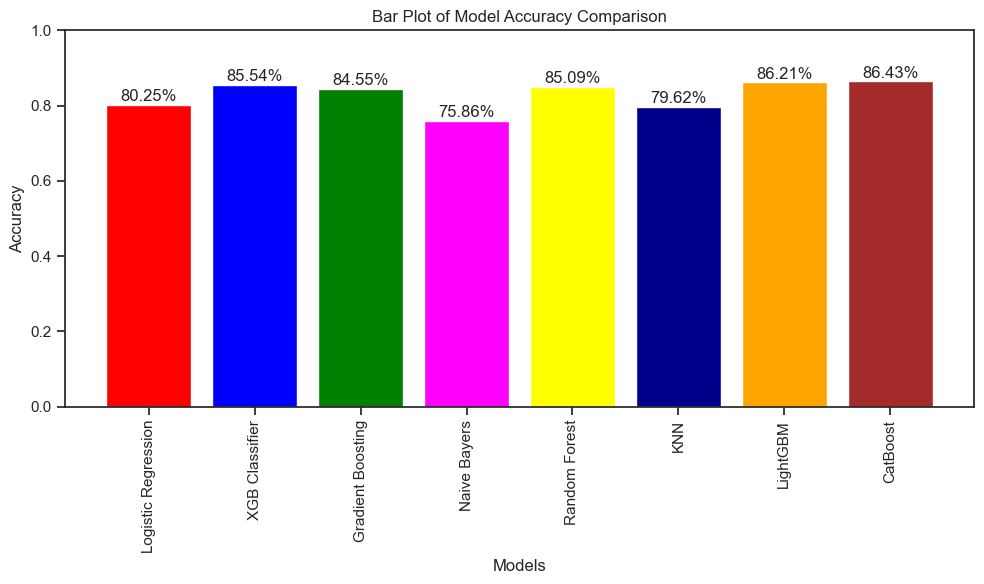

In [104]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'XGB Classifier', 'Gradient Boosting','Naive Bayers','Random Forest', 'KNN', 'LightGBM', 'CatBoost']
accuracies = [
    accuracy_score(y_test, log_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, gbc_pred),
    accuracy_score(y_test, nb_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, knn_pred),
    accuracy_score(y_test, lgbm_pred),
    accuracy_score(y_test, cat_pred)
]
# Custom colors for each bar
colors = ['red','blue','green','magenta','yellow','darkblue','orange','brown']

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.ylim(0, 1)
plt.title('Bar Plot of Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=90)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, acc + 0.01, f'{acc:.2%}', ha='center')

plt.tight_layout()
plt.show()

###  Hyper Tuning

In [106]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_dist = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.03, 0.05],
    'iterations': [300, 500, 700],
    'l2_leaf_reg': [3, 5, 7, 9],
    'bootstrap_type': ['Bayesian', 'Bernoulli'],
    'subsample': [0.7, 0.8, 0.9]
}

random_search_cat = RandomizedSearchCV(
    estimator=cat,
    param_distributions=param_dist,
    n_iter=25,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search_cat.fit(x_train, y_train)

# Best model evaluation
best_cat = random_search_cat.best_estimator_
y_pred_best = best_cat.predict(x_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Parameters:", random_search_cat.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Tuned Accuracy: 0.8660994178235557
Best Parameters: {'subsample': 0.7, 'learning_rate': 0.05, 'l2_leaf_reg': 9, 'iterations': 700, 'depth': 6, 'bootstrap_type': 'Bernoulli'}


* You are using GridSearchCV to thoroughly explore all combinations of KNN hyperparameters, which is computationally more expensive than RandomizedSearchCV but guarantees finding the best from the provided set. The final accuracy will reflect how well the tuned model generalizes.

* Best Parameters: Shows which combination of n_neighbors, weights, and metric performed best during cross-validation.

* Best Cross-Validated Accuracy: Gives an estimate of how well your model is expected to generalize.

* Test Accuracy: Indicates how well the model actually performed on unseen data (x_test).



# Prediction :

In [164]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,0,1,1,0,2343,1,0,2,5,8,1033,1,-1.000,0.0,3,1
1,56.0,0,1,1,0,45,0,0,2,5,8,1033,1,-1.000,0.0,3,1
2,41.0,9,1,1,0,1270,1,0,2,5,8,1033,1,-1.000,0.0,3,1
3,55.0,7,1,1,0,2476,1,0,2,5,8,579,1,-1.000,0.0,3,1
4,54.0,0,1,2,0,184,0,0,2,5,8,673,2,-1.000,0.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1,2,0,0,1,1,0,0,20,0,257,1,-1.000,0.0,3,0
11158,39.0,7,1,1,0,733,0,0,2,16,6,83,4,-1.000,0.0,3,0
11159,32.0,9,2,1,0,29,0,0,0,19,1,156,2,-1.000,0.0,3,0
11160,43.0,9,1,1,0,0,0,1,0,8,8,9,2,53.375,2.5,0,0


In [178]:
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
2644,36.0,9,1,2,0,1354,0,0,0,7,11,281,3,53.375,2.0,2,1
2555,55.0,9,1,1,0,1938,0,1,0,18,1,193,1,53.375,2.5,2,1
4444,20.0,1,2,1,0,423,1,0,0,16,0,498,1,-1.000,0.0,3,1
2956,40.0,0,1,2,0,764,1,0,2,17,9,85,1,-1.000,0.0,3,1
6061,32.0,8,2,3,0,1583,1,0,2,20,8,57,1,-1.000,0.0,3,0


In [180]:
sample_data=[[36.0,9,1,2,0,1354,0,0,0,7,11,281,3,53.375,2.0,2,1]]

In [182]:
sample_data_scaled=scaler.transform(sample_data)

In [184]:
prediction=random_search_cat.predict(sample_data_scaled)

In [186]:
print("Final Prediction :",prediction)

Final Prediction : [1.]


## CONCLUSION:

The dataset provides a balanced mix of demographic and campaign-related data, with significant skewness in financial figures and a majority of unknown values in past outcomes. Effective predictive modeling for deposit subscription would likely benefit from addressing class imbalance, feature encoding, and possibly imputing or modeling the "unknown" values in key fields.